<a href="https://colab.research.google.com/github/Darkness1506/PRODIGY_ML_02/blob/main/PRODIGY_ML_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("Mall_Customers.csv")

In [ ]:
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
print(df.tail())

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83


In [ ]:
print(df.isnull())

     CustomerID  Gender    Age  Annual Income (k$)  Spending Score (1-100)
0         False   False  False               False                   False
1         False   False  False               False                   False
2         False   False  False               False                   False
3         False   False  False               False                   False
4         False   False  False               False                   False
..          ...     ...    ...                 ...                     ...
195       False   False  False               False                   False
196       False   False  False               False                   False
197       False   False  False               False                   False
198       False   False  False               False                   False
199       False   False  False               False                   False

[200 rows x 5 columns]


In [ ]:
features = ["Annual Income (k$)", "Spending Score (1-100)"]
X = df[features]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
num_clusters = 5  # Assuming we want 5 clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_scaled)
df["Cluster"] = kmeans.labels_

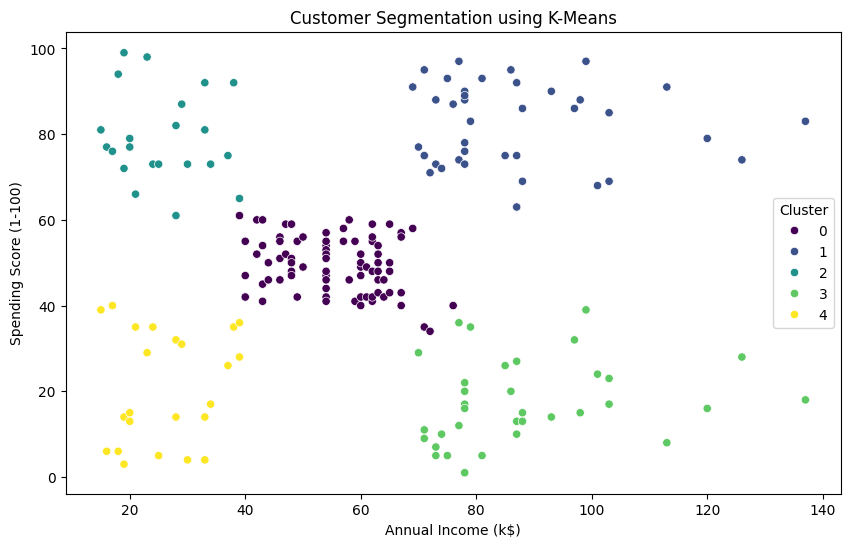

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Annual Income (k$)"], y=df["Spending Score (1-100)"], hue=df["Cluster"], palette="viridis")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segmentation using K-Means")
plt.legend(title="Cluster")
plt.show()


In [ ]:
random_input = [[60, 50]]  # Example input: 60k annual income, 50 spending score
random_input_scaled = scaler.transform(random_input)
predicted_cluster = kmeans.predict(random_input_scaled)
print("Predicted Cluster for input", random_input, ":", predicted_cluster[0])

Predicted Cluster for input [[60, 50]] : 0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5546571631111091
